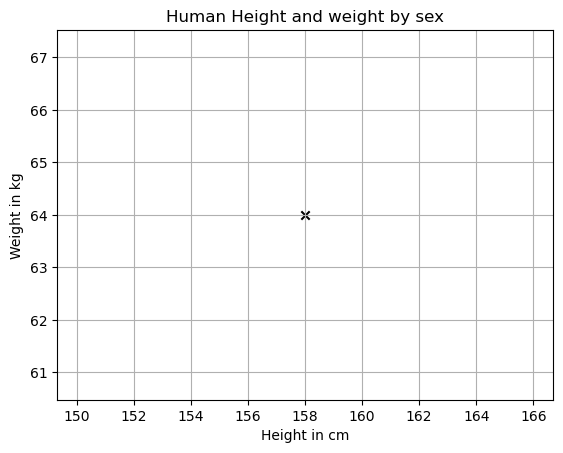

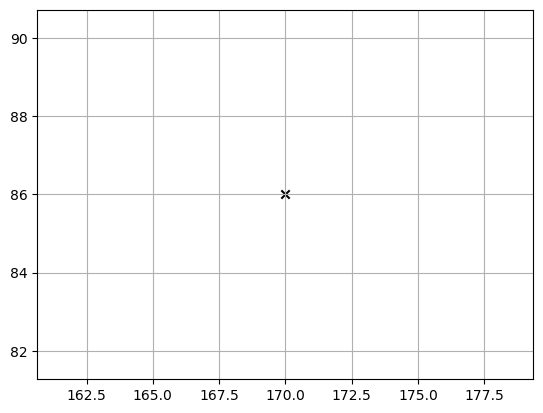

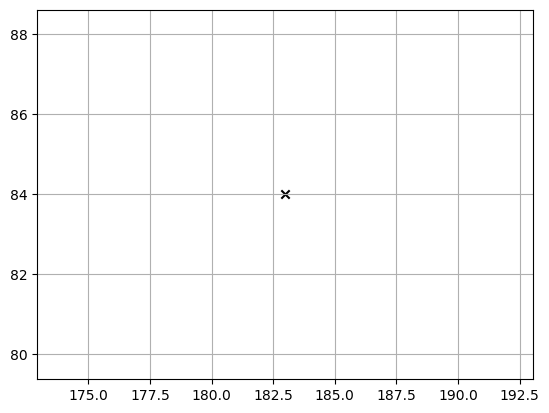

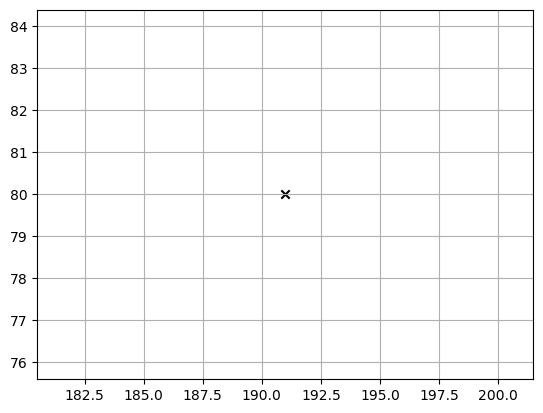

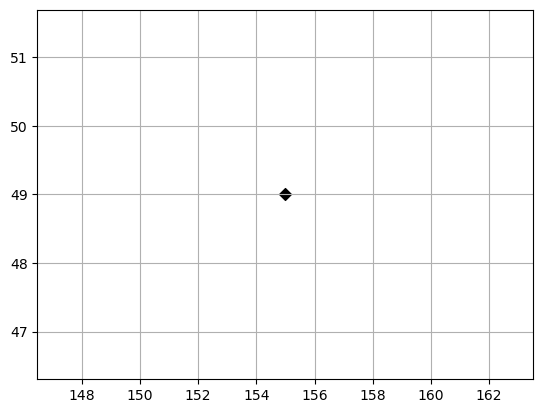

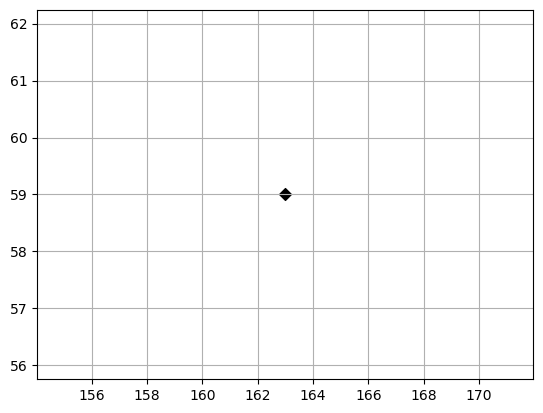

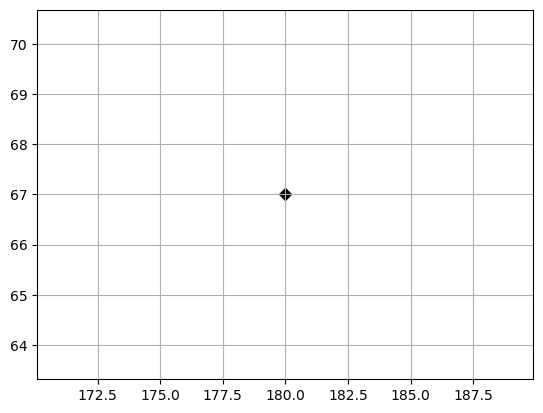

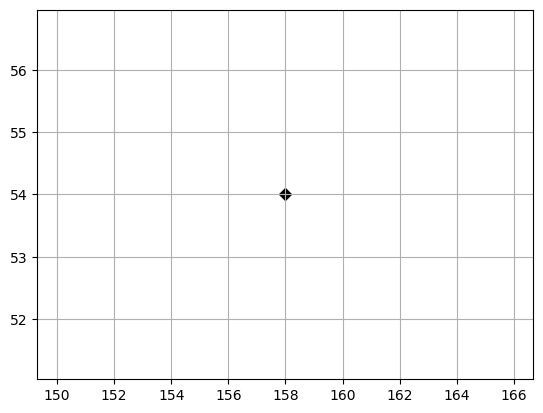

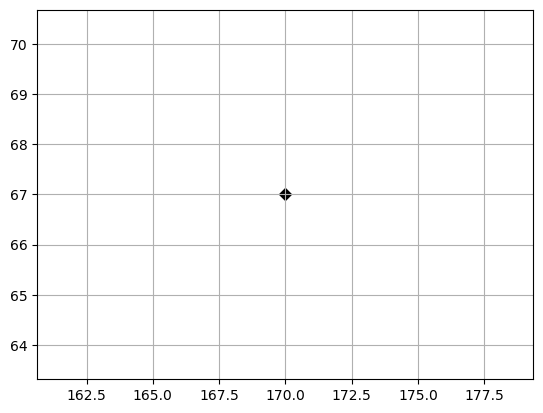

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X_train= np.array([
    [158,64],
    [170,86],
    [183,84],
    [191,80],
    [155,49],
    [163,59],
    [180,67],
    [158,54],
    [170,67]
])
y_train=['male','male','male','male','female','female','female','female','female']
plt.figure()
plt.title('Human Height and weight by sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i, x in enumerate(X_train):
    plt.scatter(x[0],x[1], c='k', marker='x' if y_train[i] == 'male' else 'D')
    plt.grid(True)
    plt.show()

In [7]:
enumerate(X_train)

In [9]:
#KNN with numpy
x=np.array([155,70])
distances=np.sqrt(np.sum((X_train-x)**2,axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [11]:
nearest_neighbor_indices=distances.argsort()[:3]
nearest_neighbor_genders=np.take(y_train,nearest_neighbor_indices)
nearest_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [14]:
from collections import Counter

b=Counter(np.take(y_train,distances.argsort()[:3]))
b.most_common
b.most_common(1)[0][0]

'female'

In [15]:
#KNN with scikit-learn
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb= LabelBinarizer()
y_train_binarized=lb.fit_transform(y_train)
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [16]:
K=3
clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train,y_train_binarized.reshape(-1))
prediction_binarized= clf.predict(np.array([155,70]).reshape(1,-1))[0]
predicted_label=lb.inverse_transform(prediction_binarized)
predicted_label

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['female'], dtype='<U6')

In [17]:
X_test=np.array([
    [168,65],
    [180,96],
    [160,52],
    [169,67]
])
y_test=['male','male','female','female']
y_test_binarized=lb.transform(y_test)
print('Binarized labels: %s' %y_test_binarized.T[0])
prediction_binarized=clf.predict(X_test)
print('Binarized predictions: %s' %prediction_binarized)
print('Predicted labels: %s' %lb.inverse_transform(prediction_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions: [0 1 0 0]
Predicted labels: ['female' 'male' 'female' 'female']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' %accuracy_score(y_test_binarized,prediction_binarized))

Accuracy: 0.75


In [21]:
from sklearn.metrics import precision_score

print('Precision: %s' %precision_score(y_test_binarized,prediction_binarized))

Precision: 1.0


In [22]:
from sklearn.metrics import recall_score
print('Recall: %s' %recall_score(y_test_binarized, prediction_binarized))

Recall: 0.5


In [23]:
#f1 is the harmonic mean of recall and precision score
from sklearn.metrics import f1_score
print('F1 score: %s' %f1_score(y_test_binarized,prediction_binarized))

F1 score: 0.6666666666666666


In [27]:
#Regression with KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train = np.array([
    [158,1],
    [170,1],
    [183,1],
    [191,1],
    [155,0],
    [163,0],
    [180,0],
    [158,0],
    [170,0]
])

y_train= [64,86,84,80,49,59,67,54,67]

X_test= np.array([
    [168,1],
    [180,1],
    [160,0],
    [169,0]
])

y_test= [65,96,52,67]

K=3
clf=KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
print('Predicted weight: %s' %prediction)
print('Coefficient of determination: %s' %r2_score(y_test,prediction))
print('Mean absolute error: %s' %mean_absolute_error(y_test, prediction))
print('Mean squared error: %s' %mean_squared_error(y_test, prediction))

Predicted weight: [70.66666667 79.         59.         70.66666667]
Coefficient of determination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error: 95.8888888888889
